# Mid-experiment image checking

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from tri_ct_tools.image.checker import plot_intensity
from tri_ct_tools.image.reader import singlecam_mean

%matplotlib widget


In [2]:
det = {
  'rows': 1524,              # Number of rows in the detector
  'cols': 1548,              # Number of columns in the detector
  'pixel_width': 0.0198,     # Pixel width in cm
  'pixel_height': 0.0198,    # Pixel height in cm
  'det_width': 30.7,         # cm, detector width
  'det_height': 30.2,        # cm, detector height
  'column_inner_D': 19.2,    # cm
  'column_outer_D': 20.0,    # cm
}

Reading U:\Xray RPT ChemE\X-ray\Xray_data\2025-06-26 Rik\02_preprocessed\1500x1500Crop_Full_120kV_22Hz\camera 1


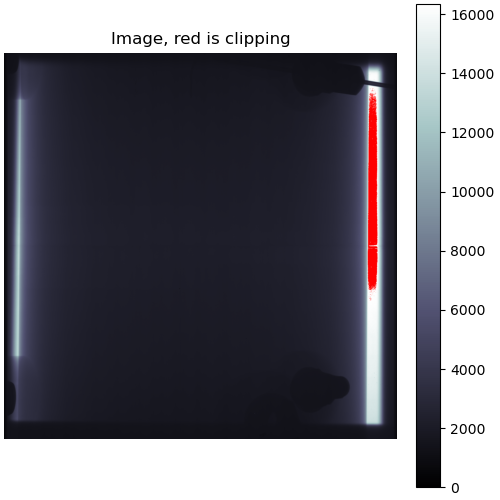

In [3]:

path = Path(R"U:\Xray RPT ChemE\X-ray\Xray_data\2025-06-26 Rik\02_preprocessed\1500x1500Crop_Full_120kV_22Hz\camera 1")
img = singlecam_mean(path, range(50, 200), (det['rows'], det['cols']))
fig, im = plot_intensity(img)
plt.colorbar(im)



Reading U:\Xray RPT ChemE\X-ray\Xray_data\2025-06-27 Rik\02_preprocessed\1500x1500Crop_150lmin_120kV_22Hz\camera 3
Reading U:\Xray RPT ChemE\X-ray\Xray_data\2025-06-27 Rik\02_preprocessed\1500x1500Crop_Full_120kV_22Hz\camera 3
Reading U:\Xray RPT ChemE\X-ray\Xray_data\2025-06-27 Rik\02_preprocessed\1500x1500Crop_Empty_120kV_22Hz\camera 3


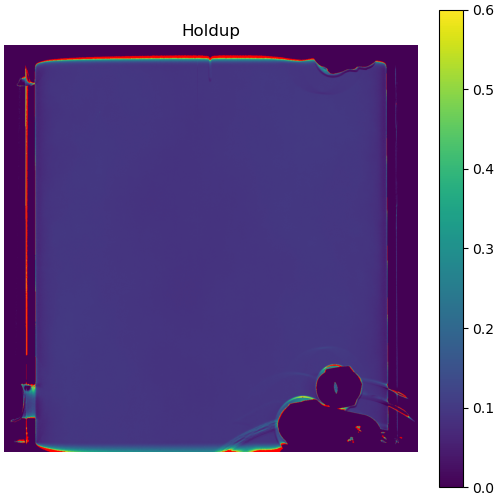

In [8]:
from tri_ct_tools.convert.holdup import plot_holdup, two_point_holdup


meas = Path(R"U:\Xray RPT ChemE\X-ray\Xray_data\2025-06-27 Rik\02_preprocessed\1500x1500Crop_150lmin_120kV_22Hz\camera 3")
full = Path(R"U:\Xray RPT ChemE\X-ray\Xray_data\2025-06-27 Rik\02_preprocessed\1500x1500Crop_Full_120kV_22Hz\camera 3")
empty = Path(R"U:\Xray RPT ChemE\X-ray\Xray_data\2025-06-27 Rik\02_preprocessed\1500x1500Crop_Empty_120kV_22Hz\camera 3")

meas_img = singlecam_mean(meas, range(50, 200), (det['rows'], det['cols']))
full_img = singlecam_mean(full, range(50, 200), (det['rows'], det['cols']))
empty_img = singlecam_mean(empty, range(50, 200), (det['rows'], det['cols']))

holdup = two_point_holdup(meas_img, full_img, empty_img)
fig, im = plot_holdup(holdup)
plt.colorbar(im)